In [95]:
import pandas as pd
import sklearn
import seaborn as sns

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn import svm, ensemble, linear_model, neighbors, naive_bayes

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [99]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)


In [118]:
from sklearn import model_selection, preprocessing

In [100]:
df = pd.read_pickle("2016_pickle_norm.pkl")

In [101]:
df.failure.value_counts()

0    1013362
1      62707
Name: failure, dtype: int64

In [102]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_187_normalized,smart_188_normalized,smart_189_normalized,smart_192_normalized,smart_197_normalized,smart_198_normalized,smart_242_normalized
0,2016-01-01,W300K1XB,ST4000DM000,4000787030016,0,100.0,100.0,96.0,100.0,100.0,100.0,100.0
1,2016-01-01,Z300H1WJ,ST4000DM000,4000787030016,0,100.0,100.0,97.0,100.0,100.0,100.0,100.0
2,2016-01-01,Z304JL7B,ST4000DM000,4000787030016,0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,2016-01-01,Z302BVHP,ST4000DM000,4000787030016,0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,2016-01-01,S300Z5BS,ST4000DM000,4000787030016,0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [103]:
df.count()

date                    1076069
serial_number           1076069
model                   1076069
capacity_bytes          1076069
failure                 1076069
smart_187_normalized    1076069
smart_188_normalized    1076069
smart_189_normalized    1076069
smart_192_normalized    1076069
smart_197_normalized    1076069
smart_198_normalized    1076069
smart_242_normalized    1076069
dtype: int64

In [104]:
y,X= df['failure'],df.drop(['failure','serial_number','model','capacity_bytes','date'],axis=1)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

In [106]:
X_test.shape

(215214, 7)

In [107]:
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=13)

#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [108]:
logit=linear_model.LogisticRegression(C = 0.1, solver='lbfgs')
#scaler = StandardScaler()

In [109]:
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)


In [110]:
logit.fit(X_train_scale,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
logit.score(X_train_scale,y_train)

0.9430159550679267

In [112]:
confusion_matrix(y_test, logit.predict(X_test))

array([[202532,      0],
       [ 12682,      0]])

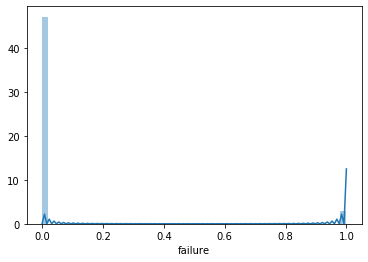

In [113]:
sns.distplot(y_test);

In [114]:
randomforest = RandomForestClassifier(n_estimators=200)

In [115]:
randomforest.fit(X_train_scale,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
randomforest.score(X_train_scale,y_train)

0.9454716531820109

In [117]:
confusion_matrix(y_test, randomforest.predict(X_test))

array([[202532,      0],
       [ 12682,      0]])